# ECE 462 - Homework #5a

## Package Imports

In [115]:
import numpy as np
from numpy import linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

## Constants

In [127]:
del_x = 1e-10
NN = 100

DX = del_x * 1e9
XX = np.arange(0, DX * NN, DX)

hbar = 1.054e-34
m0 = 9.11e-31
ecoil = 1.6e-19
eV2J = 1.6e-19
J2eV = 1.0 / eV2J
hbar_ev = hbar * J2eV
chi0 = hbar ** 2 / (2 * m0 * del_x ** 2)

## Create the $V(x)$ Potential

In [132]:
V = np.zeros((NN))
V[30:40] = 0.1 * eV2J

## Create the Hamiltonian Matrix

In [133]:
np.set_printoptions(precision=2)
H = np.zeros((NN, NN))
for diag in range(NN):
    H[diag, diag] = 2 * chi0 + V[diag] # Assign diagonals
    try:
        H[diag, diag + 1] = -chi0      # Assign col+1
    except IndexError:
        pass
    try:
        H[diag, diag - 1] = -chi0      # Assign col-1
    except IndexError:
        pass
    H[0, NN-1] = 0

## Get the `eps` and `phi` arrays from the Hamiltonian Matrix

In [134]:
eps, phi = la.eig(H)

## Plot the Function and it's Eigenstates

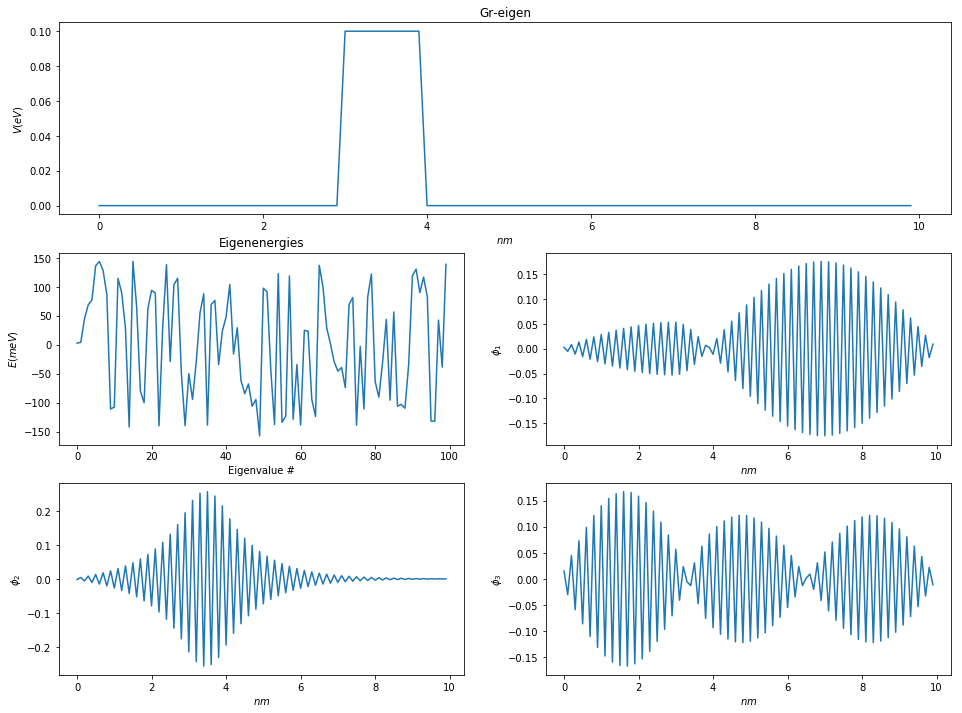

In [135]:
plt.subplot(311)
plt.title('Gr-eigen')
plt.plot(XX, J2eV * V)
plt.xlabel('$nm$')
plt.ylabel('$V(eV)$')

plt.subplot(323)
plt.title('Eigenenergies')
plt.plot(np.arange(NN), [1e3 * phi[m, m] for m in range(NN)])
plt.xlabel('Eigenvalue #')
plt.ylabel('$E (meV)$')

plt.subplot(324)
plt.plot(XX, phi[:, 0])
plt.xlabel("$nm$")
plt.ylabel("$\phi_1$")

plt.subplot(325)
plt.plot(XX, phi[:, 1])
plt.xlabel("$nm$")
plt.ylabel("$\phi_2$")

plt.subplot(326)
plt.plot(XX, phi[:, 2])
plt.xlabel("$nm$")
plt.ylabel("$\phi_3$");